<a href="https://colab.research.google.com/github/azizchedhli/azizchedhli/blob/main/Breast_Cancer_Classification_Aziz_CHEDHLI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [4]:
"/content/drive/My Drive/kaggle"


'/content/drive/My Drive/kaggle'

In [5]:
import os

os.environ['KAGGLE_USERNAME'] = "azizchedhli"
os.environ['KAGGLE_KEY'] = "ccb2db64326e0030bc405c6bf07d4368"


In [6]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.09G/3.10G [00:28<00:00, 51.7MB/s]
100% 3.10G/3.10G [00:28<00:00, 115MB/s] 


In [7]:
!ls


breast-histopathology-images.zip  drive  sample_data


In [8]:
!!unzip \*.zip  && rm *.zip

['Archive:  breast-histopathology-images.zip',
 '  inflating: 10253/0/10253_idx5_x1001_y1001_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1051_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1101_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1151_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1201_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1251_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1301_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1351_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1501_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1551_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y1701_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y351_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y401_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y451_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y501_class0.png  ',
 '  inflating: 10253/0/10253_idx5_x1001_y5

In [9]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import cv2

In [10]:
data = '/content/10264'
No_breast_cancer = '/content/10264/No'
Yes_breast_cancer = '/content/10264/Yes'

In [11]:
files=os.listdir("/content")
for f in files :
  print(f)

.config
16550
12867
10295
14079
16555
13461
9029
9126
13021
12891
10285
13402
12810
15840
16552
8863
9323
9076
16570
12751
9228
9177
9173
13458
8957
9382
10260
10308
13692
12886
12900
8865
9261
13689
8955
8867
16166
9265
12817
12931
14081
9078
14190
15473
10307
9262
15632
13022
15514
8984
9347
12910
10273
15472
10288
14154
16533
16085
13591
drive
9227
10300
12878
12819
16554
14209
15516
12824
15902
13462
12876
12811
12752
16531
15515
10302
10262
8864
9178
10274
12818
8950
12823
10258
10301
10278
12898
8917
14188
10299
9044
13687
12907
10304
9081
12897
16165
14213
9324
12820
9075
9346
12890
10259
9259
14156
13404
14155
16534
15471
9325
12750
9073
14210
14211
13694
12909
16167
12868
10291
10290
12905
8951
12906
12880
9266
8980
14321
12871
9381
12894
12870
16569
10257
12822
15513
8974
12911
9344
12892
13020
14304
10277
12935
12934
13666
12951
12879
10268
9250
12947
10253
9322
13023
8913
10261
13616
13459
12929
9023
12626
12896
8975
9035
10276
13400
IDC_regular_ps50_idx5
13693
10255
10286


In [12]:
listNo=[]
listYes=[]
for f in files :
  filepath = os.path.join("/content/",f)
  pathNo=os.path.join(filepath,"0")
  listNo.append(pathNo)
  pathYes=os.path.join(filepath,"1")
  listYes.append(pathYes)
print(listYes)

['/content/.config/1', '/content/16550/1', '/content/12867/1', '/content/10295/1', '/content/14079/1', '/content/16555/1', '/content/13461/1', '/content/9029/1', '/content/9126/1', '/content/13021/1', '/content/12891/1', '/content/10285/1', '/content/13402/1', '/content/12810/1', '/content/15840/1', '/content/16552/1', '/content/8863/1', '/content/9323/1', '/content/9076/1', '/content/16570/1', '/content/12751/1', '/content/9228/1', '/content/9177/1', '/content/9173/1', '/content/13458/1', '/content/8957/1', '/content/9382/1', '/content/10260/1', '/content/10308/1', '/content/13692/1', '/content/12886/1', '/content/12900/1', '/content/8865/1', '/content/9261/1', '/content/13689/1', '/content/8955/1', '/content/8867/1', '/content/16166/1', '/content/9265/1', '/content/12817/1', '/content/12931/1', '/content/14081/1', '/content/9078/1', '/content/14190/1', '/content/15473/1', '/content/10307/1', '/content/9262/1', '/content/15632/1', '/content/13022/1', '/content/15514/1', '/content/8984

In [13]:
filepaths1 = []
labels = []

# Iterate through listNo
for fi in listNo:
    for root, dirs, files in os.walk(fi):
        for file in files:
            filepath2 = os.path.join(root, file)
            filepaths1.append(filepath2)
            labels.append("No")



# Iterate through listYes
for ji in listYes:
    for root, dirs, files in os.walk(ji):
        for file in files:
            filepath3 = os.path.join(root, file)
            filepaths1.append(filepath3)
            labels.append("Yes")
print(labels)
print('filepaths: ', len(filepaths1), '   labels: ', len(labels))



['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No

In [16]:
No_breast_cancer = '/content/10264/0'
Yes_breast_cancer = '/content/10264/1'

In [17]:
classes = ['yes','No']
dirlist = [Yes_breast_cancer,No_breast_cancer]
filepaths=[]
labels=[]
for i,j in zip(dirlist,classes):
  filelist=os.listdir(i)
  for f in filelist :
    filepath=os.path.join(i,f)
    filepaths.append(filepath)
    labels.append(j)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))
print (labels)


filepaths:  1204    labels:  1204
['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',

In [18]:
Files=pd.Series(filepaths,name='filepaths')
Label=pd.Series(labels,name='Labels')
df=pd.concat([Files,Label],axis=1)
#df=pd.DataFrame(np.array(df).reshape(1204,2) ,columns = ['filepaths', 'labels'])
df.head()

,filepaths,Labels
0,/content/10264/1/10264_idx5_x1301_y601_class1.png,yes
1,/content/10264/1/10264_idx5_x1151_y701_class1.png,yes
2,/content/10264/1/10264_idx5_x1351_y751_class1.png,yes
3,/content/10264/1/10264_idx5_x601_y1251_class1.png,yes
4,/content/10264/1/10264_idx5_x1151_y851_class1.png,yes


In [19]:
print(df['Labels'].value_counts())

No     617
yes    587
Name: Labels, dtype: int64


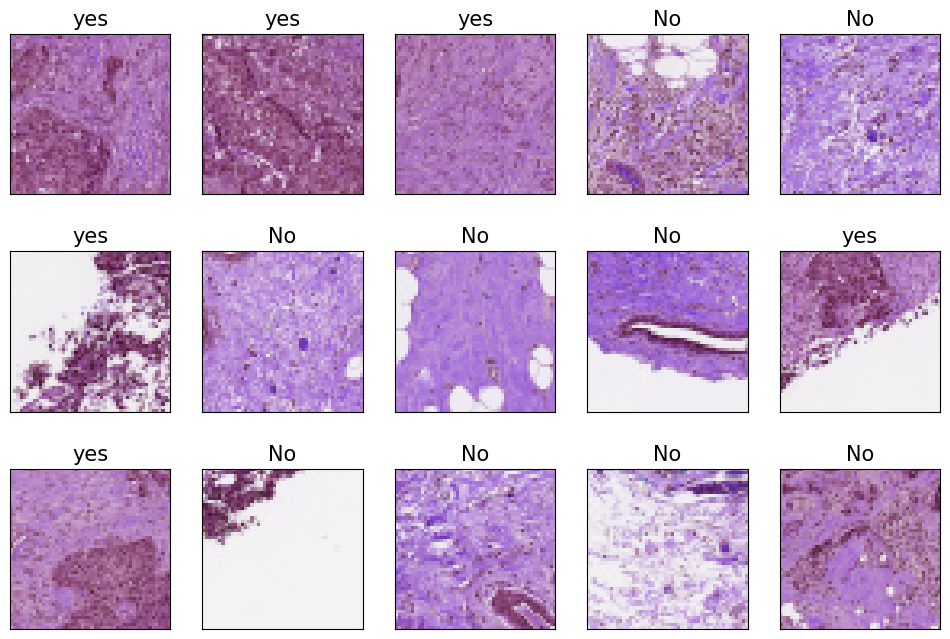

In [20]:
plt.figure(figsize=(12,8))
for i in range(15):
    random = np.random.randint(1,len(df))
    plt.subplot(3,5,i+1)
    #df.loc bech traja3lek el path ta3 el number random heka
    plt.imshow(cv2.imread(df.loc[random,"filepaths"]))
    plt.title(df.loc[random, "Labels"], size = 15, color = "black")
    plt.xticks([])
    plt.yticks([])

plt.show()

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,train_size=0.8,random_state=0)
train_new, valid = train_test_split(train,train_size=0.90,random_state=0)
print(f"train set shape: {train_new.shape}")
print(f"test set shape: {test.shape}")
print(f"validation set shape: {valid.shape}")

train set shape: (866, 2)
test set shape: (241, 2)
validation set shape: (97, 2)


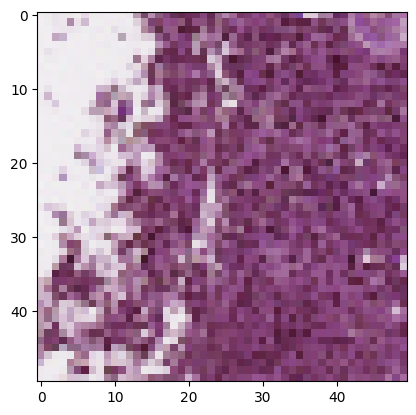

In [22]:
plt.imshow(cv2.imread(df.loc[1,"filepaths"]))


In [25]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [26]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_new,
                                              x_col = 'filepaths', y_col ='Labels',
                                              target_size = (224,224), batch_size = 32,
                                              class_mode = 'binary', shuffle = True)
val_gen = train_datagen.flow_from_dataframe(valid,
                                            target_size=(224,224), x_col = 'filepaths', y_col ='Labels',
                                            class_mode='binary',
                                            batch_size= 16, shuffle=True)
test_gen = test_datagen.flow_from_dataframe(test,
                                            target_size = (224,224), x_col = 'filepaths', y_col ='Labels',
                                             class_mode = 'binary',
                                            batch_size = 16, shuffle = False)

Found 866 validated image filenames belonging to 2 classes.
Found 97 validated image filenames belonging to 2 classes.
Found 241 validated image filenames belonging to 2 classes.


In [27]:
train_gen.class_indices


{'No': 0, 'yes': 1}

In [28]:
from tensorflow import keras
base_model = keras.applications.ResNet50V2(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))


# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.summary()

94668760/94668760 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00

In [29]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("Tumor_classifier_model.h5", save_best_only=True, verbose = 0)
]





model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate= 0.0001), metrics=['accuracy'])


history = model.fit(train_gen, validation_data = val_gen, epochs = 100,
                    callbacks = [callbacks], verbose = 1)


Epoch 1/100
28/28 [==============================] - ETA: 0s - loss: 0.8200 - accuracy: 0.4388

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 29s 635ms/step - loss: 0.8200 - accuracy: 0.4388 - val_loss: 0.8278 - val_accuracy: 0.3299
Epoch 2/100
28/28 [==============================] - 14s 486ms/step - loss: 0.7892 - accuracy: 0.4908 - val_loss: 0.7437 - val_accuracy: 0.4227
Epoch 3/100
28/28 [==============================] - 15s 550ms/step - loss: 0.7002 - accuracy: 0.5774 - val_loss: 0.7265 - val_accuracy: 0.5155
Epoch 4/100
28/28 [==============================] - 14s 485ms/step - loss: 0.6566 - accuracy: 0.6328 - val_loss: 0.7288 - val_accuracy: 0.5052
Epoch 5/100
28/28 [==============================] - 14s 502ms/step - loss: 0.6437 - accuracy: 0.6316 - val_loss: 0.6644 - val_accuracy: 0.5567
Epoch 6/100
28/28 [==============================] - 14s 495ms/step - loss: 0.5962 - accuracy: 0.6778 - val_loss: 0.6434 - val_accuracy: 0.6082
Epoch 7/100
28/28 [==============================] - 14s 496ms/step - loss: 0.5652 - accuracy: 0.7275 - val_loss: 0.6134 - val_accuracy: 0.6392
Epoc

In [30]:
model.save("model.h5")


In [ ]:
Model Evaluation

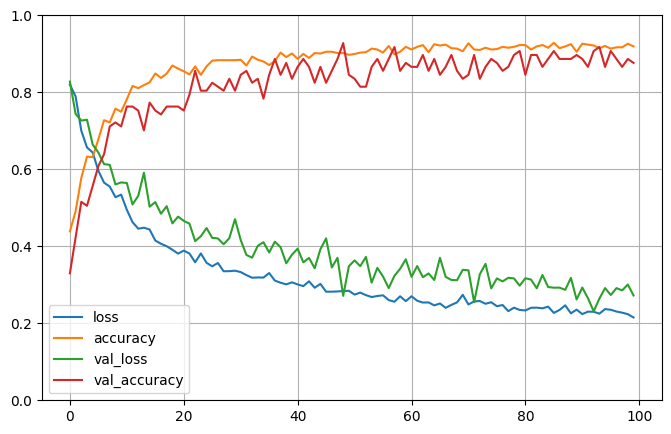

In [31]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:

from PIL import Image
model_path = "model.h5"
loaded_model = tf.keras.models.load_model(model_path)

# import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread("/content/10264/0/10264_idx5_x1001_y501_class0.png")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((224, 224))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
if pred >= 0.5:
  print("Yes")
else:
  print("No")

1/1 [==============================] - 1s 870ms/step
Yes


In [37]:
train_gen.class_indices


{'No': 0, 'yes': 1}